Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


Load Dataset

In [2]:
# Load train and test
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape, test.shape)
train.head()


(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Combine Train & Test for Preprocessing

In [3]:
# Drop target column from train and combine
combined = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)
combined.shape


(2919, 80)

Handle Missing Values & Encode

In [4]:
# Fill numeric with median
combined = combined.fillna(combined.median(numeric_only=True))
# Fill remaining categorical with 'None'
combined = combined.fillna('None')

# One-hot encode categorical columns
combined = pd.get_dummies(combined, drop_first=True)
combined.shape


(2919, 268)

Split into Train/Test

In [5]:
X = combined.iloc[:train.shape[0], :]
y = np.log1p(train['SalePrice'])  # Log transform

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape


((1168, 268), (292, 268))

Evaluation Function

In [9]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)

    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    r2 = r2_score(y_valid, preds)

    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_valid, y=preds, alpha=0.6)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name}: Actual vs Predicted')
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
    plt.grid(True)
    plt.show()


Linear Regression - RMSE: 0.1733, R²: 0.8391


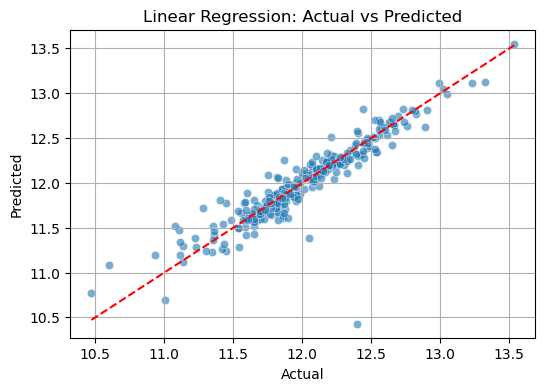

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
evaluate_model(lr, 'Linear Regression')


Simple Linear Regression RMSE: 0.2929274855665348


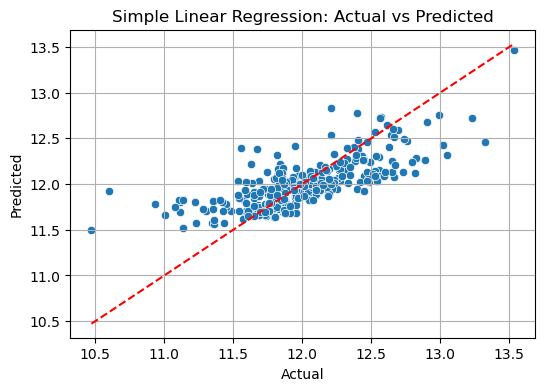

In [12]:
from sklearn.linear_model import LinearRegression

# Use only one feature
feat = 'GrLivArea'
X_single = X[[feat]]
X_train_s, X_valid_s, y_train_s, y_valid_s = train_test_split(X_single, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)
preds = lr_simple.predict(X_valid_s)

print("Simple Linear Regression RMSE:", np.sqrt(mean_squared_error(y_valid_s, preds)))

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_valid_s, y=preds)
plt.plot([y_valid_s.min(), y_valid_s.max()], [y_valid_s.min(), y_valid_s.max()], 'r--')
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


Multiple Linear Regression - RMSE: 0.1733, R²: 0.8391


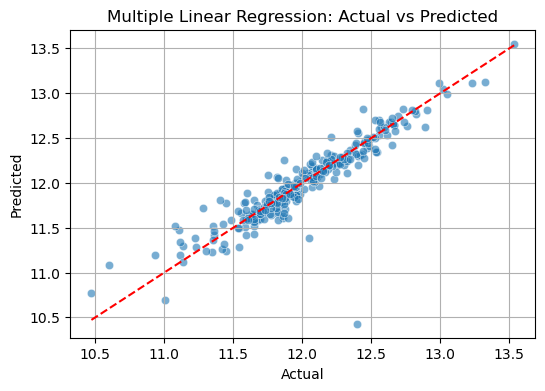

In [13]:
lr = LinearRegression()
evaluate_model(lr, 'Multiple Linear Regression')


Polynomial Regression RMSE: 0.473086502923318


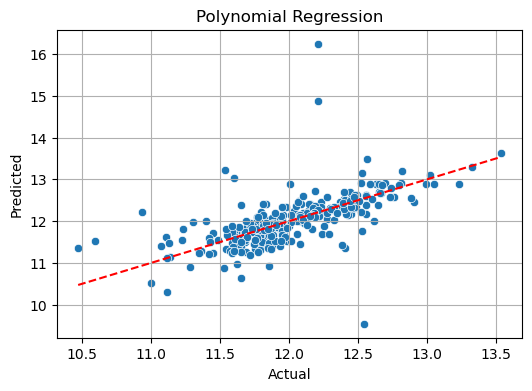

In [14]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_valid_p, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_p, y_train)
preds_poly = lr_poly.predict(X_valid_p)

print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_valid, preds_poly)))

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_valid, y=preds_poly)
plt.title("Polynomial Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.grid(True)
plt.show()


Ridge Regression - RMSE: 0.1381, R²: 0.8979


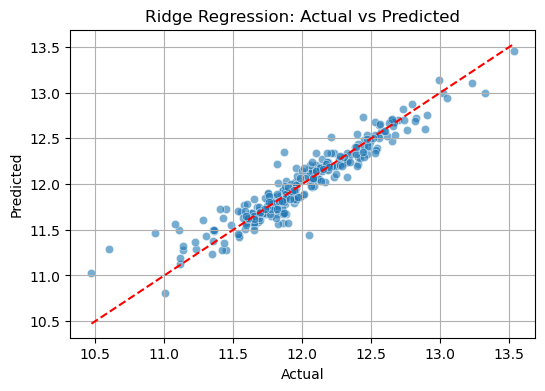

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
evaluate_model(ridge, 'Ridge Regression')


Lasso Regression - RMSE: 0.1421, R²: 0.8917


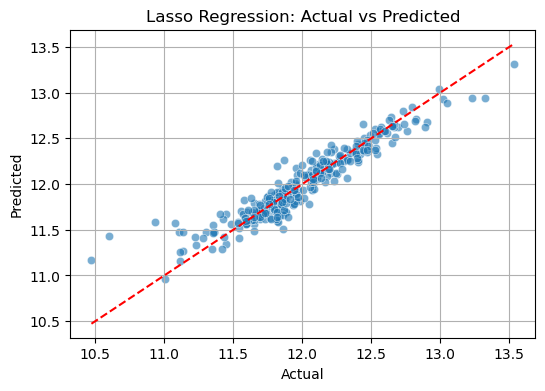

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
evaluate_model(lasso, 'Lasso Regression')


Lasso Regression - RMSE: 0.1421, R²: 0.8917


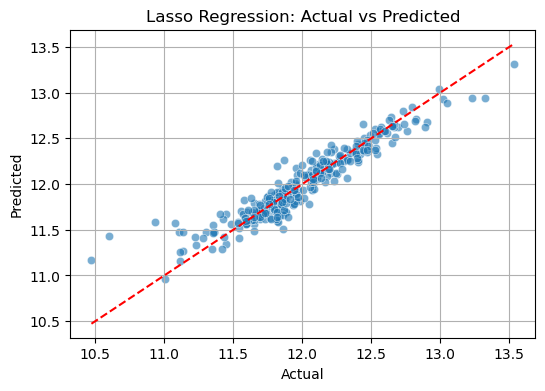

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
evaluate_model(lasso, 'Lasso Regression')


ElasticNet Regression - RMSE: 0.1415, R²: 0.8927


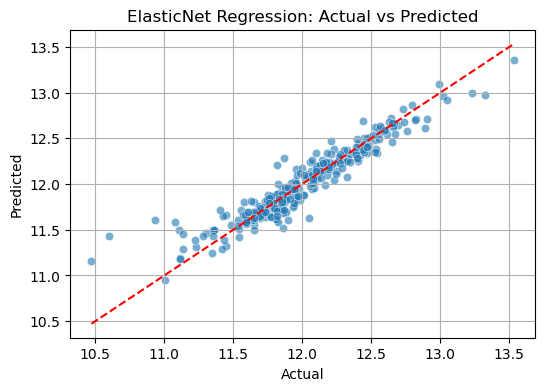

In [18]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.001, l1_ratio=0.5)
evaluate_model(elastic, 'ElasticNet Regression')


KNN Regression - RMSE: 0.2283, R²: 0.7208


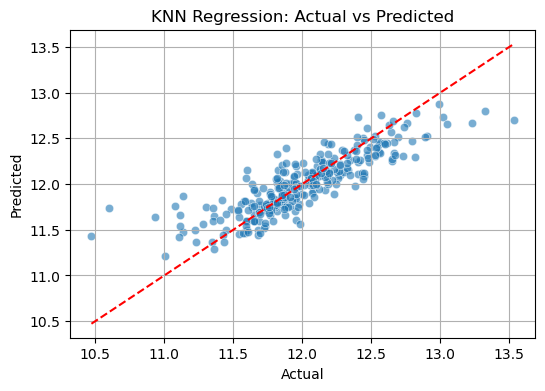

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, 'KNN Regression')


Decision Tree Regression - RMSE: 0.2056, R²: 0.7734


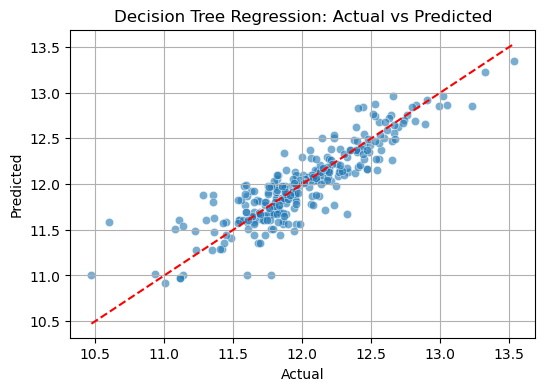

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
evaluate_model(dt, 'Decision Tree Regression')


Random Forest Regression - RMSE: 0.1470, R²: 0.8842


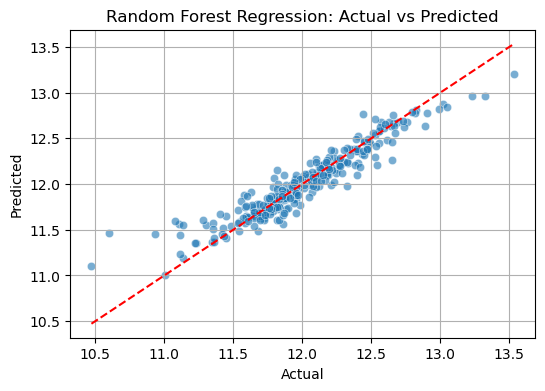

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, 'Random Forest Regression')


SVR RMSE: 0.2150302251881239


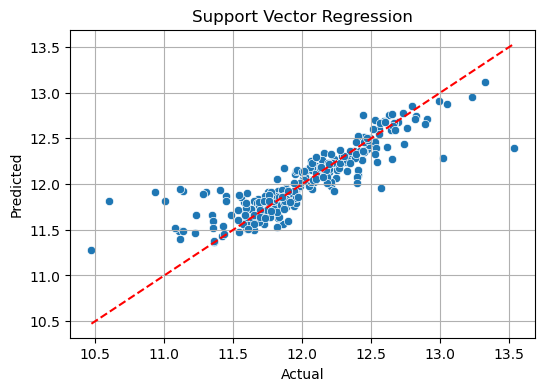

In [22]:
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
preds_svr = svr.predict(X_valid_scaled)

print("SVR RMSE:", np.sqrt(mean_squared_error(y_valid, preds_svr)))

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_valid, y=preds_svr)
plt.title("Support Vector Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.grid(True)
plt.show()
